In [210]:
# Install Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [211]:
# Ignore Warning
from warnings import filterwarnings
filterwarnings('ignore')


In [212]:
#Load DataSet
#read in the dataset (2015)

year15 = '2015'
brfss_2015_dataset = pd.read_csv(f'C:\Github\Diabetes\Diabetes\Data\{year15}.csv')
brfss_2015_dataset.info

<bound method DataFrame.info of         _STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0          1.0     1.0  b'01292015'  b'01'  b'29'  b'2015'    1200.0   
1          1.0     1.0  b'01202015'  b'01'  b'20'  b'2015'    1100.0   
2          1.0     1.0  b'02012015'  b'02'  b'01'  b'2015'    1200.0   
3          1.0     1.0  b'01142015'  b'01'  b'14'  b'2015'    1100.0   
4          1.0     1.0  b'01142015'  b'01'  b'14'  b'2015'    1100.0   
...        ...     ...          ...    ...    ...      ...       ...   
441451    72.0    11.0  b'12162015'  b'12'  b'16'  b'2015'    1100.0   
441452    72.0    11.0  b'12142015'  b'12'  b'14'  b'2015'    1100.0   
441453    72.0    11.0  b'12232015'  b'12'  b'23'  b'2015'    1200.0   
441454    72.0    11.0  b'12152015'  b'12'  b'15'  b'2015'    1100.0   
441455    72.0    11.0  b'12152015'  b'12'  b'15'  b'2015'    1100.0   

               SEQNO          _PSU  CTELENUM  ...  _PAREC1  _PASTAE1  \
0       2.015000e+09  2.015000e

In [213]:

# select specific columns, based on BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
brfss_df_selected = brfss_2015_dataset[['DIABETE3',
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', '_MICHD', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

brfss_df_selected.info

<bound method DataFrame.info of         DIABETE3  _RFHYPE5  TOLDHI2  _CHOLCHK   _BMI5  SMOKE100  CVDSTRK3  \
0            3.0       2.0      1.0       1.0  4018.0       1.0       2.0   
1            3.0       1.0      2.0       2.0  2509.0       1.0       2.0   
2            3.0       1.0      1.0       1.0  2204.0       NaN       1.0   
3            3.0       2.0      1.0       1.0  2819.0       2.0       2.0   
4            3.0       1.0      2.0       1.0  2437.0       2.0       2.0   
...          ...       ...      ...       ...     ...       ...       ...   
441451       1.0       2.0      1.0       1.0  1842.0       2.0       2.0   
441452       3.0       1.0      2.0       1.0  2834.0       2.0       2.0   
441453       3.0       2.0      1.0       1.0  4110.0       1.0       2.0   
441454       3.0       2.0      2.0       1.0  2315.0       2.0       2.0   
441455       1.0       2.0      1.0       1.0  2469.0       2.0       2.0   

        _MICHD  _TOTINDA  _FRTLT1  ...  HLT

In [214]:
#Step 1 - Remove Missing Values records
brfss_df_selected = brfss_df_selected.dropna()
brfss_df_selected.shape

(343606, 22)

In [215]:
# 1 DIABETE3 (Column 111, data value provied as below)
# Description: (Ever told) you have diabetes  (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". 
# If Respondent says pre-diabetes or borderline diabetes, use response code 4.) 

# 1 = Yes
# 2 = Yes, But female told only during pregnancy
# 3 = No
# 4 = No, pre-diabetes or borderline diabetes
# 7 = Don't know or not sure
# 9 = Refused

# Modify data value
# 1 = changed to 2 
# 2 = changed to 0 
# 3 = changed to 0
# 4 = changed to 1
# 7 = removed records
# 9 = removed records

print("before", brfss_df_selected.DIABETE3.unique())
brfss_df_selected['DIABETE3'] = brfss_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 9]
print("After", brfss_df_selected.DIABETE3.unique())
brfss_df_selected.shape

before [3. 1. 4. 2. 7. 9.]
After [0. 2. 1.]


(343232, 22)

In [216]:
# 2 _RFHYPE5 (Column 1896, data value provided as below)
#Description: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional

# 1 = No
# 2 = Yes
# 9 = Don’t know/Not Sure/Refused/Missing

# Modify data value 
# 1 = changed to 0
# 2 = Changed to 1 
# 9 = Removed records
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure

print("Before", brfss_df_selected._RFHYPE5.unique())
brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
print("After", brfss_df_selected._RFHYPE5.unique())
brfss_df_selected.shape

Before [2. 1. 9.]
After [1. 0.]


(342539, 22)

In [217]:
# 3 TOLDHI2 (Column 1898, data value provided as below)
# Description: Adults who have had their cholesterol checked and have been told by a doctor, nurse, 
# or other health professional that it was high

# 1 = No
# 2 = Yes
# 9 = Don’t know/Not Sure/Refused/Missing

# Modify data value 
# 1 = Unchange
# 2 = change to 0
# 7 = Removed records
# 9 = Removed records


print("Before", brfss_df_selected.TOLDHI2.unique())
brfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]
print("After", brfss_df_selected.TOLDHI2.unique())
brfss_df_selected.shape

Before [1. 2. 7. 9.]
After [1. 0.]


(339832, 22)

In [218]:
# 4 _CHOLCHK (Column 1897, data value provided as below)
# Description: Cholesterol check within past five years 
 
# 1 = Had cholesterol checked in past 5 years
# 2 = Did not have cholesterol checked in past 5 years
# 3 = Have never had cholesterol checked 
# 9 = Don’t know/Not Sure/Refused/Missing

# Modify data value 
# 1 = Unchange
# 2 = change to 0
# 3 = change to 0
# 9 = Removed records

print("Before", brfss_df_selected._CHOLCHK.unique())
brfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]
print("After", brfss_df_selected._CHOLCHK.unique())
brfss_df_selected.shape

Before [1. 2. 9.]
After [1. 0.]


(335490, 22)

In [219]:
# 5 _BMI5 (Column 1898 ~ 1991, data value provided as below)
# Description: Body Mass Index (BMI) 

# 1 - 9999 1 or greater

# Modify data value
# BMI * 100, to remove decimal points for example a BMI of 4018 is really 40.18

print("Before", brfss_df_selected._BMI5.unique())
brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
brfss_df_selected._BMI5.unique()
print("After", brfss_df_selected._BMI5.unique())
brfss_df_selected.shape

Before [4018. 2509. 2819. ... 4159. 1444. 6076.]
After [40. 25. 28. 24. 27. 30. 26. 23. 34. 33. 21. 22. 31. 38. 20. 19. 32. 46.
 41. 37. 36. 29. 35. 18. 54. 45. 39. 47. 43. 55. 49. 42. 17. 16. 48. 44.
 50. 59. 15. 52. 53. 57. 51. 14. 58. 63. 61. 56. 60. 74. 62. 64. 13. 66.
 73. 65. 68. 85. 71. 84. 67. 70. 82. 79. 92. 72. 88. 96. 81. 12. 77. 95.
 75. 91. 69. 76. 87. 89. 83. 98. 86. 80. 90. 78. 97.]


(335490, 22)

In [220]:
# 6 SMOKE100 (Column 194, data value provided as below)
# Description: Have you smoked at least 100 cigarettes in your entire life?   [Note:  5 packs = 100 cigarettes]

# 1 = Yes
# 2 = No
# 7 = Don’t know/Not Sure
# 9 = Refused

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 7 = Removed records
# 9 = Removed records

print("Before", brfss_df_selected.SMOKE100.unique())
brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
print("After", brfss_df_selected.SMOKE100.unique())
brfss_df_selected.shape

Before [1. 2. 7. 9.]
After [1. 0.]


(333529, 22)

In [221]:
# 7 CVDSTRK3 (Column 108, data value provided as below)
# Description: (Ever told) you had a stroke

# 1 = Yes
# 2 = No
# 7 = Don’t know/Not Sure
# 9 = Refused

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 7 = Removed records
# 9 = Removed records

print("Before", brfss_df_selected.CVDSTRK3.unique())
brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
print("After", brfss_df_selected.CVDSTRK3.unique())
brfss_df_selected.shape

Before [2. 1. 7. 9.]
After [0. 1.]


(332801, 22)

In [222]:
# 8 _MICHD (Column 1899, data value provided as below)
# Description: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) 

# 1 = Reported having MI or CHD 
# 2 = Did not report having MI or CHD 


# Modify data value
# 1 = Unchange
# 2 = change to 0


print("Before", brfss_df_selected._MICHD.unique())
brfss_df_selected['_MICHD'] = brfss_df_selected['_MICHD'].replace({2: 0})
brfss_df_selected._MICHD.unique()
print("After", brfss_df_selected._MICHD.unique())
brfss_df_selected.shape

Before [2. 1.]
After [0. 1.]


(332801, 22)

In [223]:
# 9 _TOTINDA (Column 2058, data value provided as below)
# Description: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job 

# 1 = Had physical activity or exercise
# 2 = No physical activity or exercise in last 30 days
# 9 = Don’t know/Refused/Missing

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 9 = Removed records

print("Before", brfss_df_selected._TOTINDA.unique())
brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
print("After", brfss_df_selected._TOTINDA.unique())
brfss_df_selected.shape

Before [2. 1. 9.]
After [0. 1.]


(317404, 22)

In [224]:
# 10 _FRTLT1 (Column 2050, data value provided as below)
# Description: Consume Fruit 1 or more times per day 

# 1 = Consumed fruit one or more times per day
# 2 = Consumed fruit less than one time per day 
# 9 = Don’t know/Refused/Missing

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 9 = Removed records

print("Before", brfss_df_selected._FRTLT1.unique())
brfss_df_selected['_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
print("After", brfss_df_selected._FRTLT1.unique())
brfss_df_selected.shape

Before [2. 1. 9.]
After [0. 1.]


(309768, 22)

In [225]:
# 11 _VEGLT1 (Column 2051, data value provided as below)
# Description: Consume Vegetables 1 or more times per day 

# 1 = Consumed vegetables one or more times per day 
# 2 = Consumed vegetables less than one time per day 
# 9 = Don’t know/Refused/Missing

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 9 = Removed records

print("Before", brfss_df_selected._VEGLT1.unique())
brfss_df_selected['_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
print("After", brfss_df_selected._VEGLT1.unique())
brfss_df_selected.shape

Before [1. 2. 9.]
After [1. 0.]


(302160, 22)

In [226]:
# 12 _RFDRHV5 (Column 2009, data value provided as below)
# Description: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

# 1 = No 
# 2 = Yes
# 9 = Don’t know/Refused/Missing

# Modify data value
# 1 = change to 0
# 2 = change to 1
# 9 = Removed records

print("Before", brfss_df_selected._RFDRHV5.unique())
brfss_df_selected['_RFDRHV5'] = brfss_df_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFDRHV5 != 9]
print("After", brfss_df_selected._RFDRHV5.unique())
brfss_df_selected.shape

Before [1. 9. 2.]
After [0. 1.]


(298637, 22)

In [227]:
# 13 HLTHPLN1 (Column 97, data value provided as below)
# Description: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? 

# 1 = Yes
# 2 = No
# 7 = Don’t know/Not Sure 
# 9 = Refused

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 7 = Removed records
# 9 = Removed records

print("Before", brfss_df_selected.HLTHPLN1.unique())
brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 9]
print("After", brfss_df_selected.HLTHPLN1.unique())
brfss_df_selected.shape

Before [1. 2. 9. 7.]
After [1. 0.]


(298145, 22)

In [228]:
# 14 MEDCOST (Column 99, data value provided as below)
# Description: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

# 1 = Yes
# 2 = No
# 7 = Don’t know/Not Sure 
# 9 = Refused

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 7 = Removed records
# 9 = Removed records

print("Before", brfss_df_selected.MEDCOST.unique())
brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 9]
print("After", brfss_df_selected.MEDCOST.unique())
brfss_df_selected.shape

Before [2. 1. 7. 9.]
After [0. 1.]


(297709, 22)

In [229]:
# 15 GENHLTH (Column 90, data value provided as below)
# Description: Would you say that in general your health is: 

# 1 = Excellent
# 2 = Very good
# 3 = Good
# 4 = Fair
# 5 = Poor
# 7 = Don’t know/Not Sure
# 9 = Refused

# Modify data value
# 1 = Unchange
# 2 = Unchange
# 3 = Unchange
# 4 = Unchange
# 5 = Unchange
# 7 = Removed records
# 9 = Removed records
print("Before", brfss_df_selected.GENHLTH.unique())
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
print("After", brfss_df_selected.GENHLTH.unique())
brfss_df_selected.shape

Before [5. 3. 2. 4. 1. 7. 9.]
After [5. 3. 2. 4. 1.]


(297194, 22)

In [230]:
# 16 MENTHLTH (Column 93-94, data value provided as below)
# Description: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many 
# days during the past 30 days was your mental health not good?

# 1 ~ 30 = Number of days 
# 88 = None
# 77 = Don’t know/Not Sure
# 99 = Refused

# Modify data value
# 1 ~ 30 = Unchange
# 88 = change to 0
# 77 = Removed records
# 99 = Removed records

print("Before", brfss_df_selected.MENTHLTH.unique())
brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
print("After", brfss_df_selected.MENTHLTH.unique())
brfss_df_selected.shape

Before [18. 88. 30.  3. 99.  5. 15. 10.  6. 20.  2. 25.  1. 29.  4. 77.  7.  8.
 21. 14. 26.  9. 16. 28. 11. 12. 24. 17. 13. 23. 27. 19. 22.]
After [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1. 29.  4.  7.  8. 21. 14.
 26.  9. 16. 28. 11. 12. 24. 17. 13. 23. 27. 19. 22.]


(294102, 22)

In [231]:
# 17 PHYSHLTH (Column 91-92, data value provided as below)
# Description: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 
# 30 days was your physical health not good? 

# 1 ~ 30 = Number of days 
# 88 = None
# 77 = Don’t know/Not Sure
# 99 = Refused

# Modify data value
# 1 ~ 30 = Unchange
# 88 = change to 0
# 77 = Removed records
# 99 = Removed records

print("Before", brfss_df_selected.PHYSHLTH.unique())
brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
print("After", brfss_df_selected.MENTHLTH.unique())
brfss_df_selected.shape

Before [15. 88. 30.  2. 14. 28.  7. 77. 20.  3. 10.  1.  5. 17.  4. 19.  6. 21.
 12.  8. 25. 27. 22. 29. 24.  9. 16. 99. 18. 23. 13. 26. 11.]
After [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
  9. 29. 16. 28. 11. 12. 24. 17. 13. 23. 27. 19. 22.]


(290473, 22)

In [232]:
# 18 DIFFWALK (Column 191, data value provided as below)
# Description: Do you have serious difficulty walking or climbing stairs? 

# 1 = Yes
# 2 = No
# 7 = Don’t know/Not Sure 
# 9 = Refused

# Modify data value
# 1 = Unchange
# 2 = change to 0
# 7 = Removed records
# 9 = Removed records

print("Before", brfss_df_selected.DIFFWALK.unique())
brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
print("After", brfss_df_selected.DIFFWALK.unique())
brfss_df_selected.shape

Before [1. 2. 7. 9.]
After [1. 0.]


(289698, 22)

In [233]:
# 19 SEX (Column 120, data value provided as below)
# Description: Indicate sex of respondent. 

# 1 = Male
# 2 = Female

# Modify data value
# 1 = Unchange
# 2 = change to 0

print("Before", brfss_df_selected.SEX.unique())
brfss_df_selected['SEX'] = brfss_df_selected['SEX'].replace({2:0})
brfss_df_selected.SEX.unique()
print("After", brfss_df_selected.SEX.unique())
brfss_df_selected.shape

Before [2. 1.]
After [0. 1.]


(289698, 22)

In [234]:
# 20 _AGEG5YR (Column 1971 ~ 1972 , data value provided as below)
# Description: Fourteen-level age category 

# 1 = Age 18 to 24
# 2 = Age 25 to 29
# 3 = Age 30 to 34
# 4 = Age 35 to 39
# 5 = Age 40 to 44
# 6 = Age 45 to 49
# 7 = Age 50 to 54 
# 8 = Age 55 to 59
# 9 = Age 60 to 64
# 10 = Age 65 to 69
# 11 = Age 70 to 74
# 12 = Age 75 to 79 
# 13 = Age 80 or 99 (older) 
# 14 = Don’t know/Refused/Missing

# Modify data value
# 1 to 13 = Unchange
# 14 = Removed records

print("Before", brfss_df_selected._AGEG5YR.unique())
brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
print("After", brfss_df_selected._AGEG5YR.unique())
brfss_df_selected.shape

Before [ 9.  7. 11. 10. 13.  8.  4.  6.  2. 12.  5.  1.  3. 14.]
After [ 9.  7. 11. 10. 13.  8.  4.  6.  2. 12.  5.  1.  3.]


(288259, 22)

In [235]:
# 21 EDUCA (Column 158 , data value provided as below)
# Description: What is the highest grade or year of school you completed? 

# 1 = Never attended school or only kindergarten 
# 2 = Grades 1 through 8 (Elementary) 
# 3 = Grades 9 through 11 (Some high school)
# 4 = Grade 12 or GED (High school graduate)
# 5 = College 1 year to 3 years (Some college or technical school
# 6 = College 4 years or more (College graduate) 
# 9 = Refused

# Modify data value
# 1 to 6 = Unchange
# 9 = Removed records

print("Before", brfss_df_selected.EDUCA.unique())
brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
print("After", brfss_df_selected.EDUCA.unique())
brfss_df_selected.shape

Before [4. 6. 3. 5. 2. 1. 9.]
After [4. 6. 3. 5. 2. 1.]


(287931, 22)

In [236]:
# 22 INCOME2 (Column 175-176 , data value provided as below)
# Description: Is your annual household income from all sources:  (If respondent refuses at any income level, code "Refused.")

# 1 = Less than $10,000 
# 2 = Less than $15,000 ($10,000 to less than $15,000)  
# 3 = Less than $20,000 ($15,000 to less than $20,000)
# 4 = Less than $25,000 ($20,000 to less than $25,000) 
# 5 = Less than $35,000 ($25,000 to less than $35,000)
# 6 = Less than $50,000 ($35,000 to less than $50,000) 
# 7 = Less than $75,000 ($50,000 to less than $75,000)
# 8 = $75,000 or more 
# 77 = Don’t know/Not sure 
# 99 = Refused

# Modify data value
# 1 to 8 = Unchange
# 77 = Removed records
# 99 = Removed records

print("Before", brfss_df_selected.INCOME2.unique())
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
print("After", brfss_df_selected.INCOME2.unique())
brfss_df_selected.shape

Before [ 3.  1.  8.  6.  4.  7. 77.  2.  5. 99.]
After [3. 1. 8. 6. 4. 7. 2. 5.]


(253680, 22)

In [237]:
#Check the shape of the dataset now
brfss_df_selected.shape

(253680, 22)

In [238]:
#Let's see what the data looks like after Modifying Values
brfss_df_selected.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [239]:
#Check Class Sizes of the Diabete3 column
brfss_df_selected.groupby(['DIABETE3']).size()

DIABETE3
0.0    213703
1.0      4631
2.0     35346
dtype: int64

In [240]:
#Rename the columns to make them more readable
brfss = brfss_df_selected.rename(columns = {'DIABETE3':'Diabetes_012', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })


In [241]:
brfss.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [242]:
#Check how many respondents have no diabetes, prediabetes or diabetes. Note the class imbalance!
brfss.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64

In [243]:
#************************************************************************************************
brfss.to_csv('diabetes_012_health_indicators_BRFSS2015.csv', sep=",", index=False)
#************************************************************************************************

In [244]:
#Copy old table to new one.
brfss_binary = brfss
#Change the diabetics 2 to a 1 and pre-diabetics 1 to a 0, so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({1:0})
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({2:1})

#Change the column name to Diabetes_binary
brfss_binary = brfss_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()

array([0., 1.])

In [245]:
#show class sizes
brfss_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64

In [246]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = brfss_binary['Diabetes_binary'] == 1
brfss_5050_1 = brfss_binary[is1]

#Get the 0s
is0 = brfss_binary['Diabetes_binary'] == 0
brfss_5050_0 = brfss_binary[is0] 

#Select the 39977 random cases from the 0 (non-diabetes group). we already have 35346 cases from the diabetes risk group
brfss_5050_0_rand1 = brfss_5050_0.take(np.random.permutation(len(brfss_5050_0))[:35346])

#Append the 39977 1s to the 39977 randomly selected 0s


brfss_5050 = pd.concat([brfss_5050_0_rand1, brfss_5050_1], ignore_index=True)

In [247]:
print(f'brfss_5050={brfss_5050.shape}',f'brfss_binary={brfss_binary.shape}')

brfss_5050=(70692, 22) brfss_binary=(253680, 22)


In [248]:
#Save the 50-50 balanced dataset to csv
#************************************************************************************************
brfss_5050.to_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv', sep=",", index=False)
#************************************************************************************************

#Also save the original binary dataset to csv
#************************************************************************************************
brfss_binary.to_csv('diabetes_binary_health_indicators_BRFSS2015.csv', sep=",", index=False)
#************************************************************************************************

In [249]:
data = brfss_binary
data['Diabetes'] = data['Diabetes_binary']
data=data.drop(columns=["Diabetes_binary"])
# data = df_012
# data = df_5050

In [250]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

HighBP                  16935
HighChol                16935
CholCheck               16935
BMI                     16935
Smoker                  16935
Stroke                  16935
HeartDiseaseorAttack    16935
PhysActivity            16935
Fruits                  16935
Veggies                 16935
HvyAlcoholConsump       16935
AnyHealthcare           16935
NoDocbcCost             16935
GenHlth                 16935
MentHlth                16935
PhysHlth                16935
DiffWalk                16935
Sex                     16935
Age                     16935
Education               16935
Income                  16935
Diabetes                16935
dtype: int64

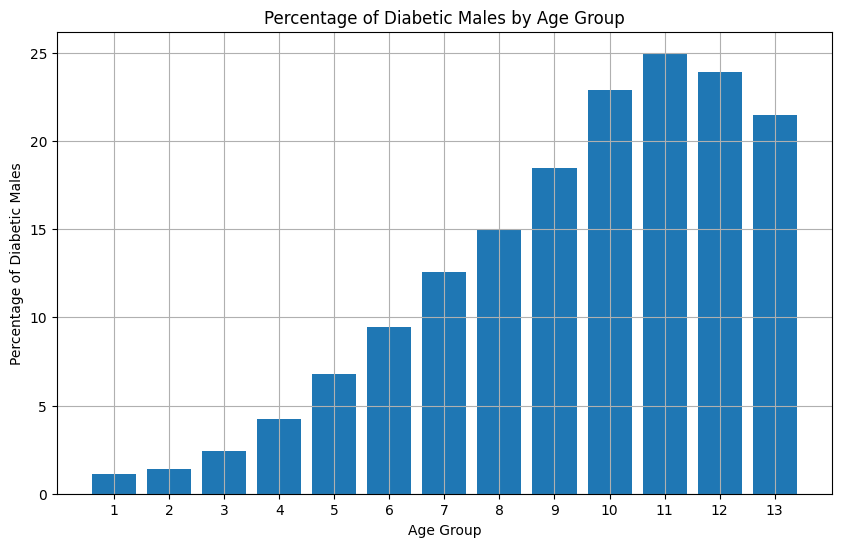

Maximum percentage of diabetic males is 24.95% at age group 11.


In [251]:
# frequency of diabetics of all ages for male

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age Group')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age group {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

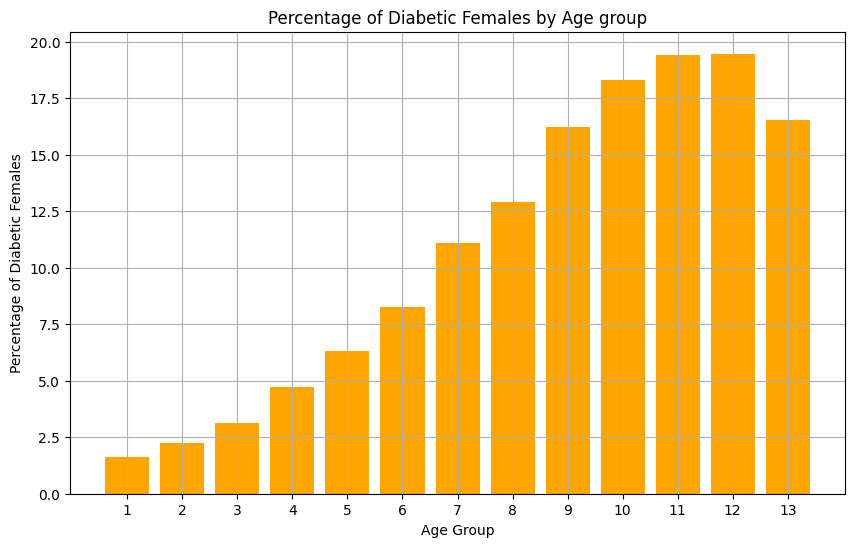

Maximum percentage of diabetic females is 19.47% at age group 12.


In [252]:
# frequency of diabetics of all ages for female

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100, color = 'orange')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age group')
plt.xticks(female_diabetic_by_age ['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age group {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

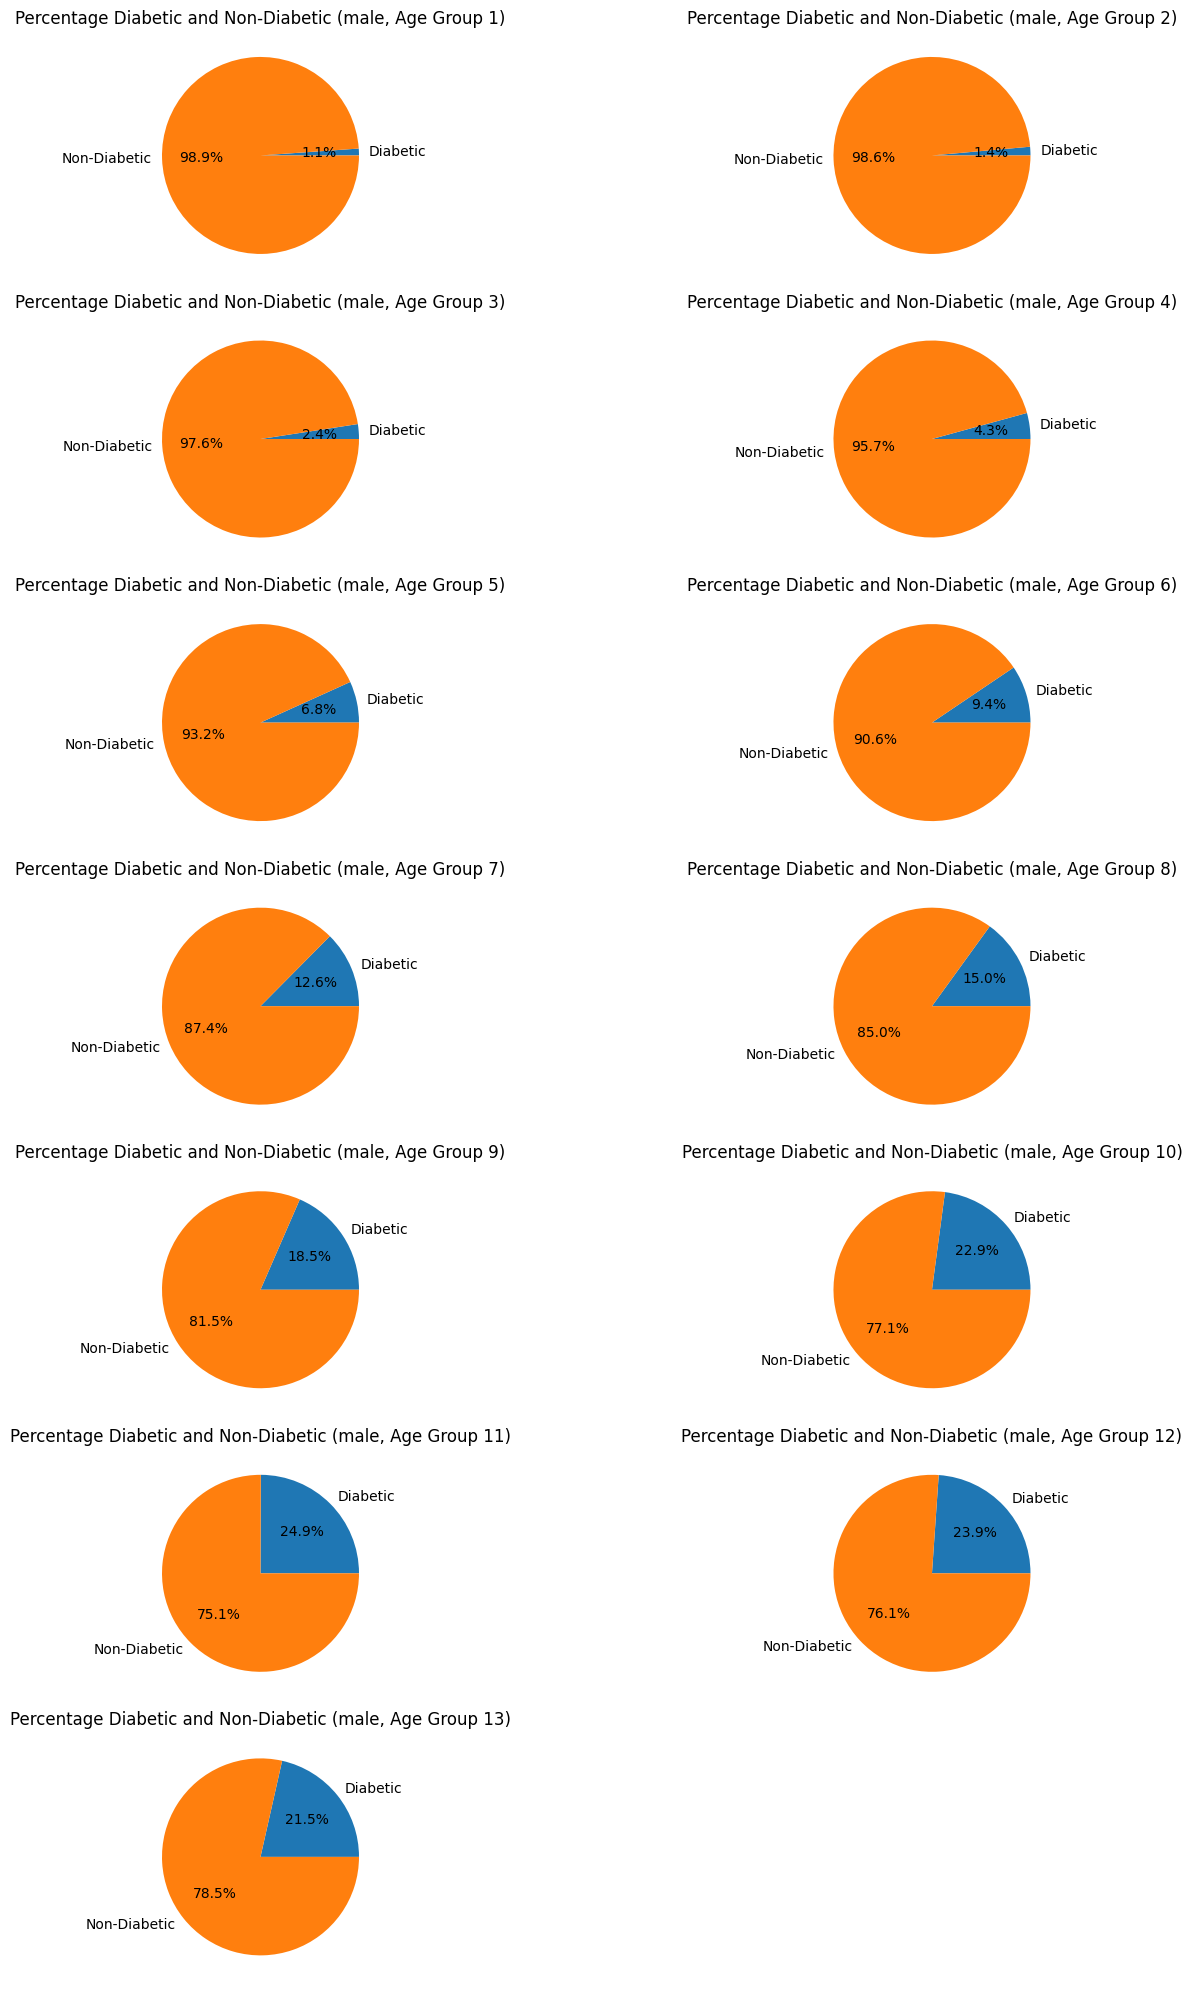

In [253]:
# percentage of diabetics and nondiabetics for male in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_male = data[(data['Sex'] == 1) & (data['Age'] == age)]
    total_male = len(df_male)
    diabetic_male = len(df_male[df_male['Diabetes'] == 1])
    non_diabetic_male = len(df_male[df_male['Diabetes'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (male, Age Group {age})')
plt.tight_layout()
plt.show()

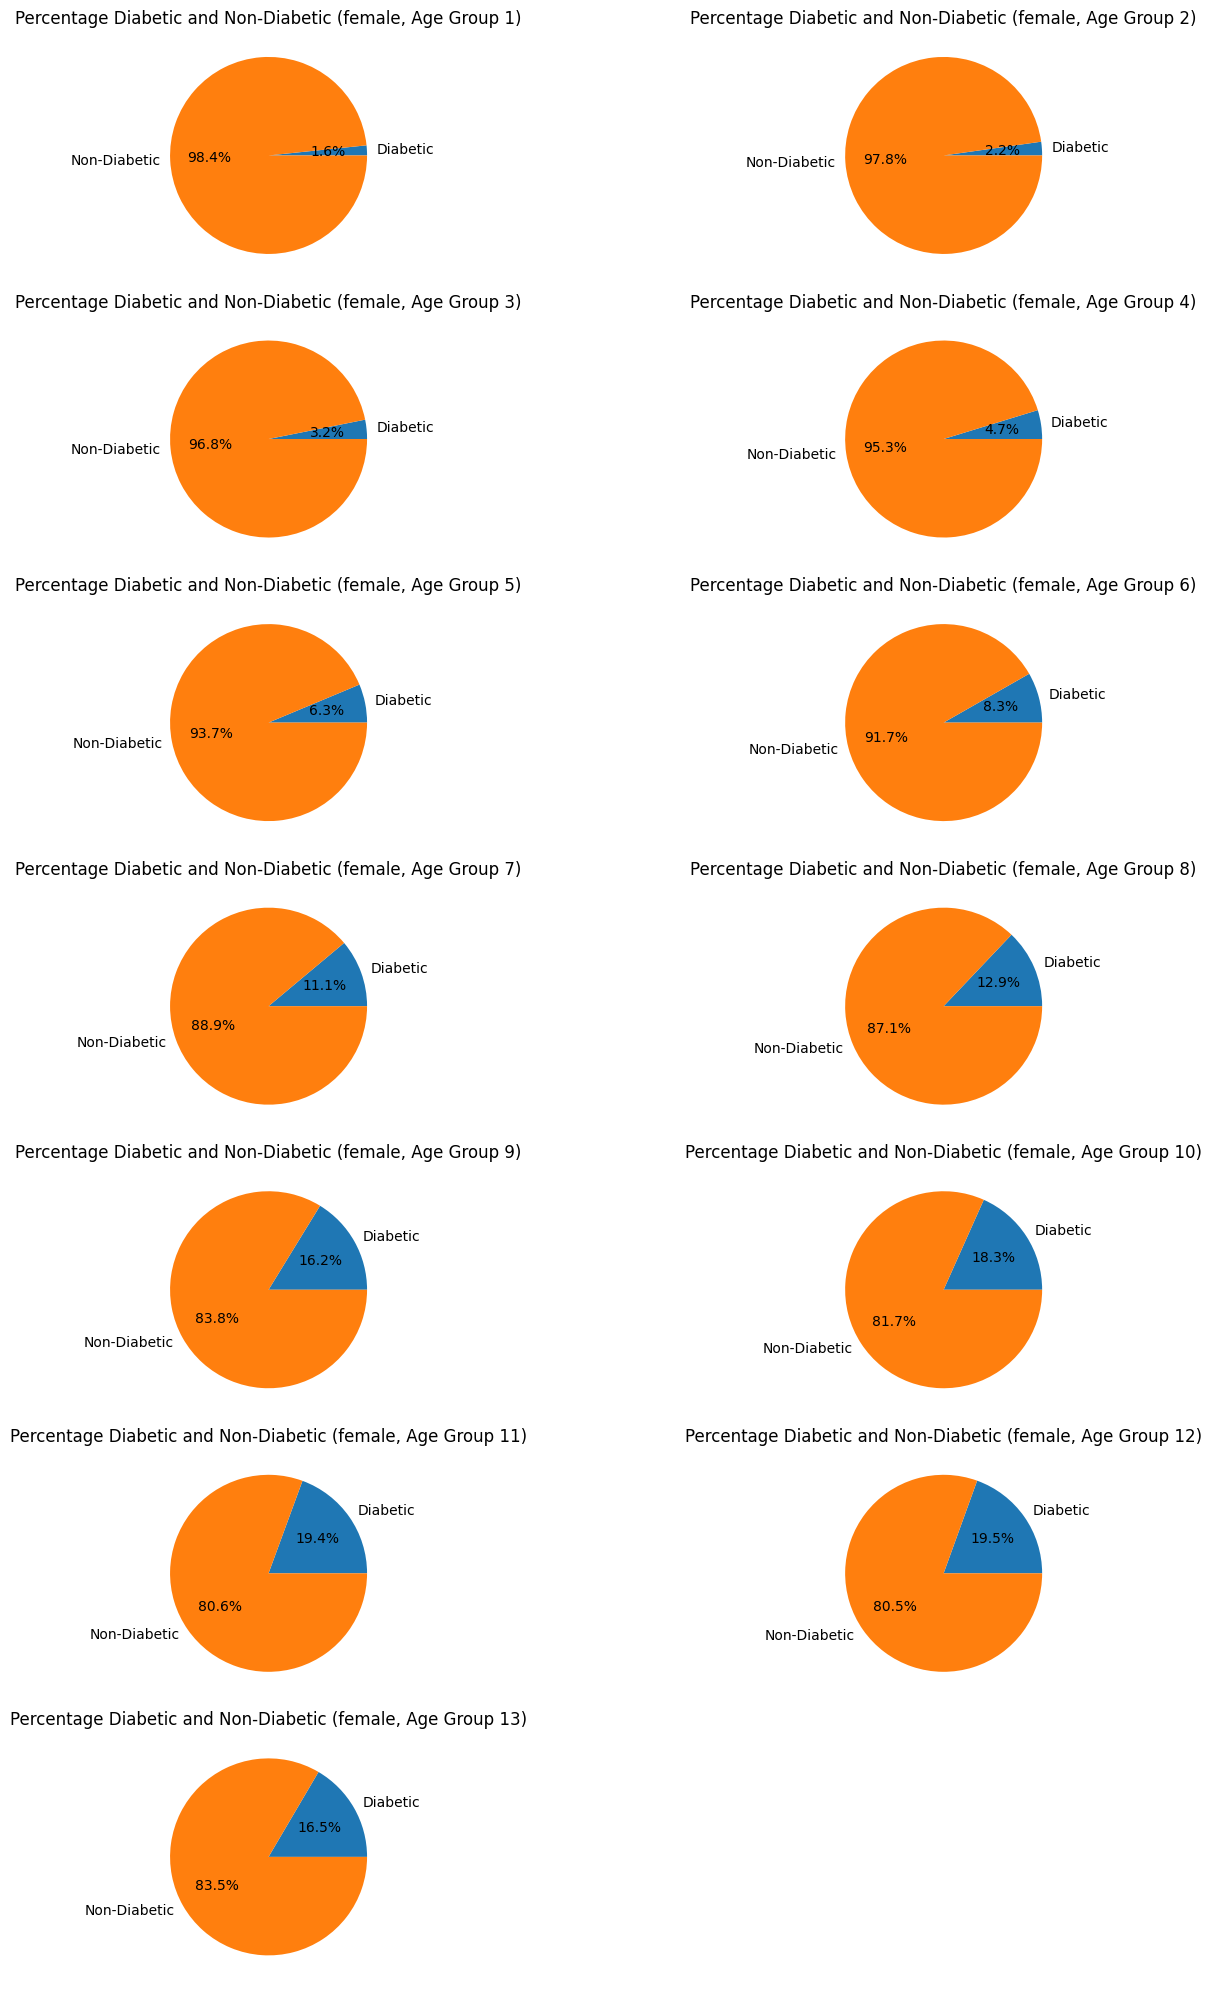

In [254]:
# percentage of diabetics and nondiabetics for female in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 0) & (data['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (female, Age Group {age})')
plt.tight_layout()
plt.show()

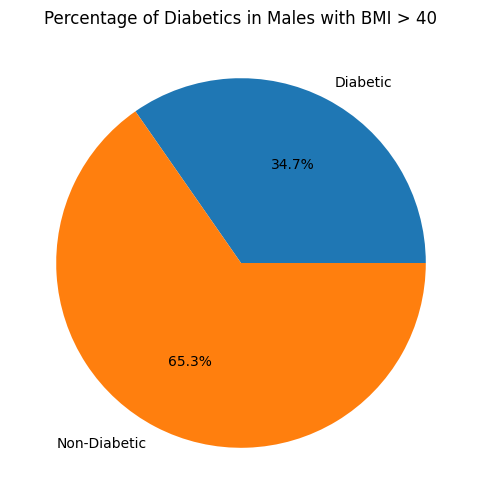

Percentage of diabetics in males with BMI > 40: 34.7%


In [255]:
# Filter data for males with BMI > 40
male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with BMI > 40')
plt.show()

print(f"Percentage of diabetics in males with BMI > 40: {percent_diabetic:.1f}%")

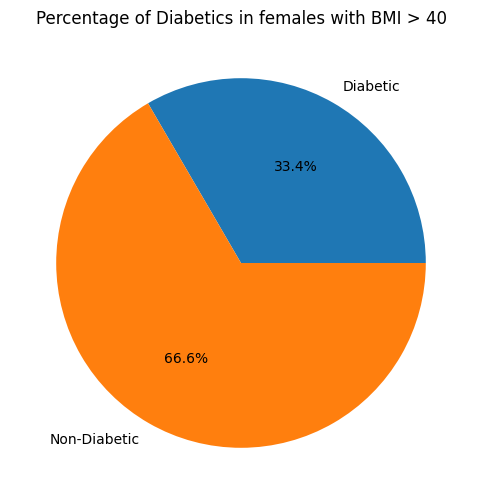

Percentage of diabetics in females with BMI > 40: 34.7%


In [256]:
# Filter data for females with BMI > 40
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
fepercent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([fepercent_diabetic, 100 - fepercent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in females with BMI > 40')
plt.show()

print(f"Percentage of diabetics in females with BMI > 40: {percent_diabetic:.1f}%")

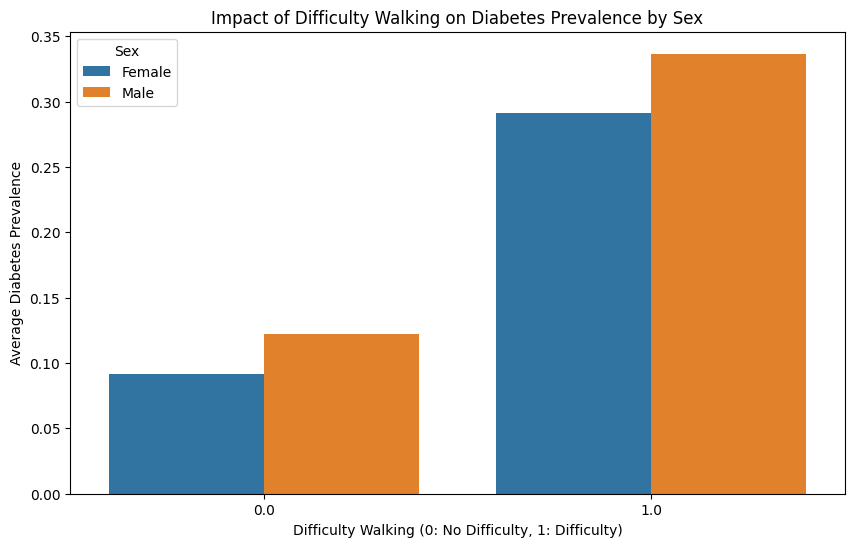

In [257]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = data.groupby(['Sex', 'DiffWalk'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})


# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()

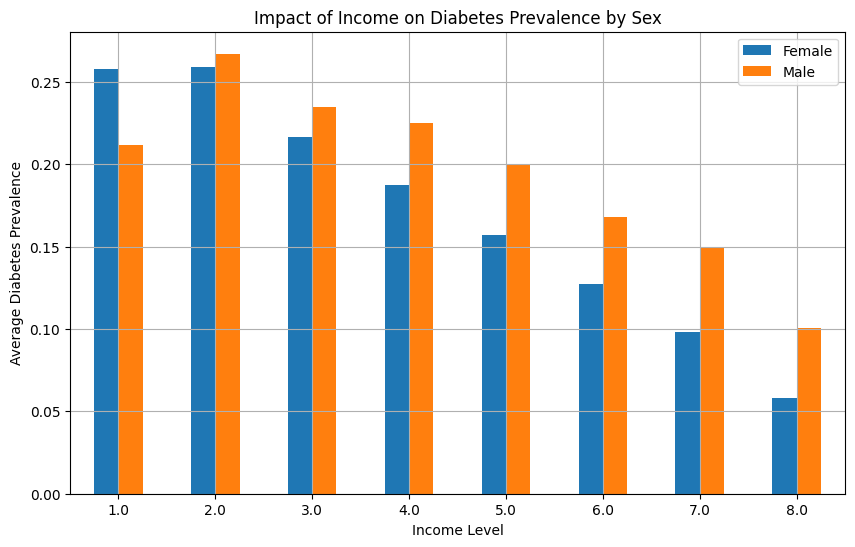

In [258]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()


# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

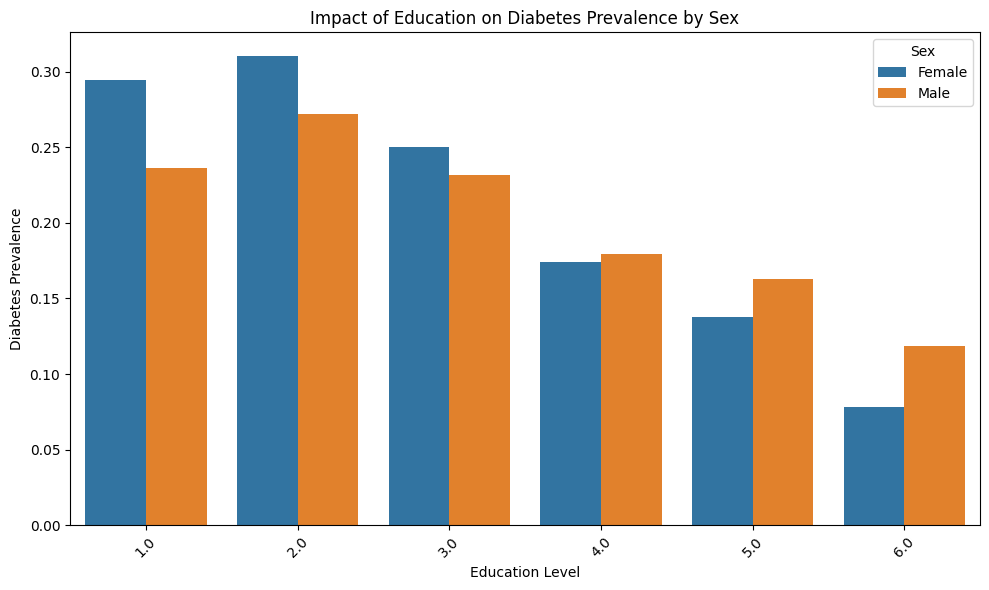

In [259]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

# Map sex values to labels
education_diabetes['Sex'] = education_diabetes['Sex'].map({0: 'Female', 1: 'Male'})


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

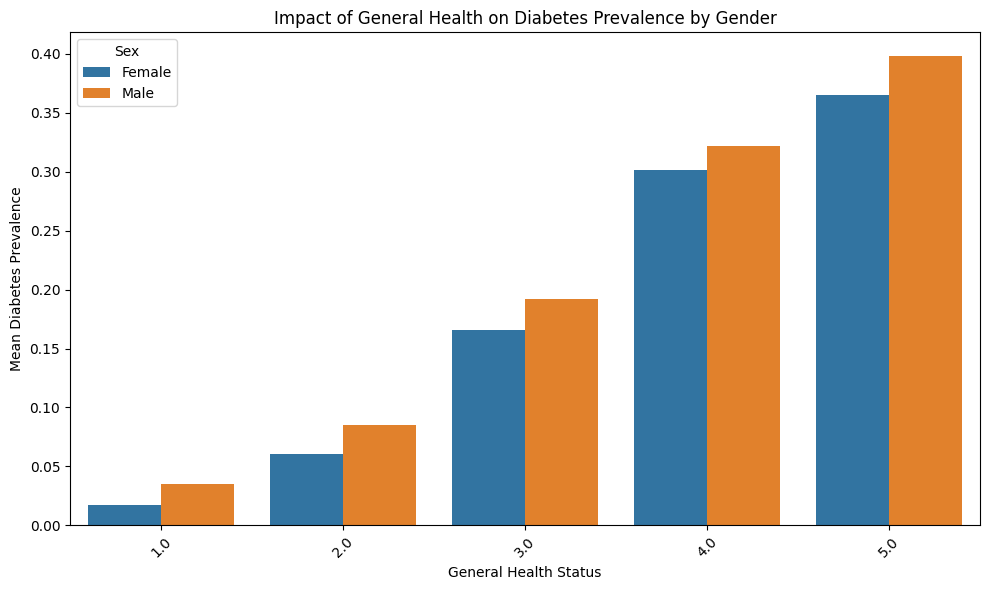

In [260]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

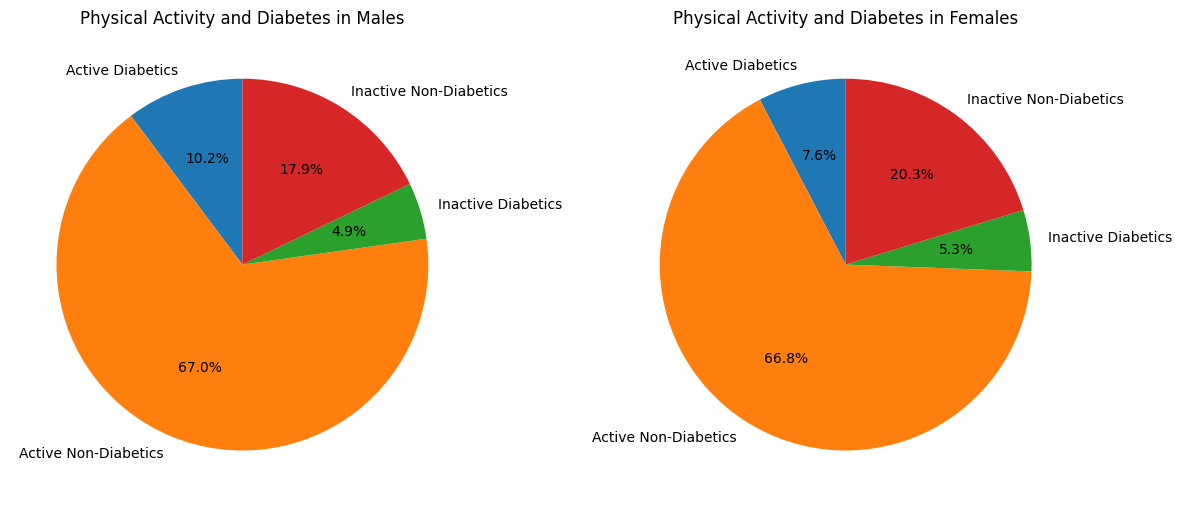

In [261]:
# the percent impact of PhysActivity  in  diabetic for male and female

male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for males
male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for females
female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Physical Activity and Diabetes in Males')

# Female pie chart
axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Physical Activity and Diabetes in Females')

plt.tight_layout()
plt.show()

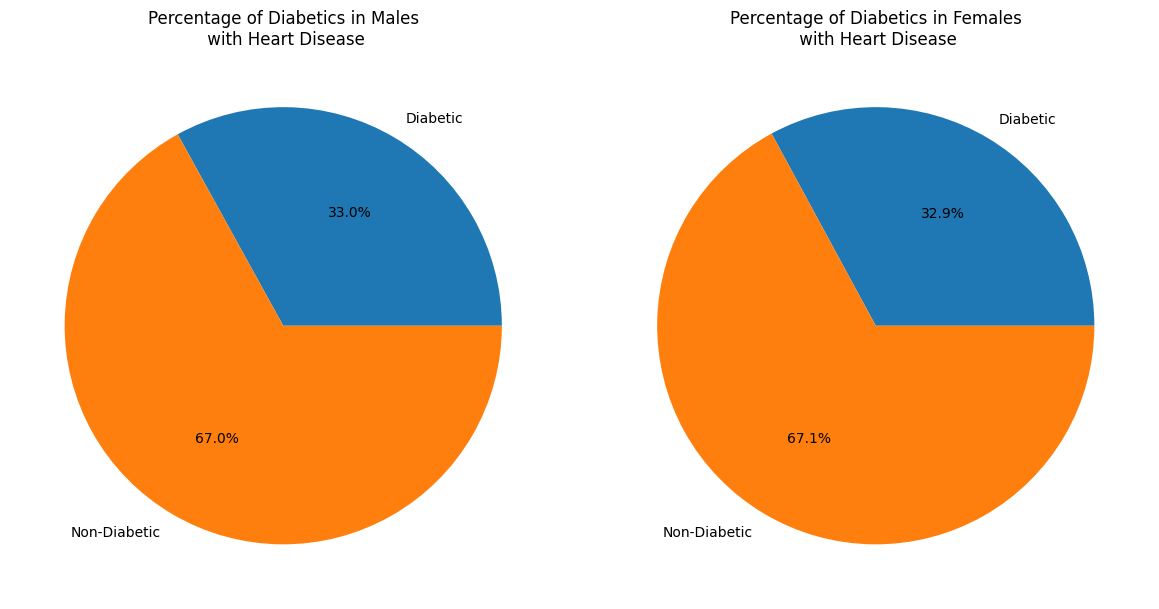

Percentage of diabetics in males with heart disease: 33.0%
Percentage of diabetics in males without heart disease: 12.7%
Percentage of diabetics in females with heart disease: 32.9%
Percentage of diabetics in females without heart disease: 11.4%


In [262]:
#the percent impact of   HeartDiseaseorAttack in diabetic for male and female

male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

# Calculate percentages of diabetics for each group
male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males\n with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females\n with Heart Disease')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with heart disease: {male_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in males without heart disease: {male_nohd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females with heart disease: {female_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females without heart disease: {female_nohd_diabetic_percent:.1f}%")

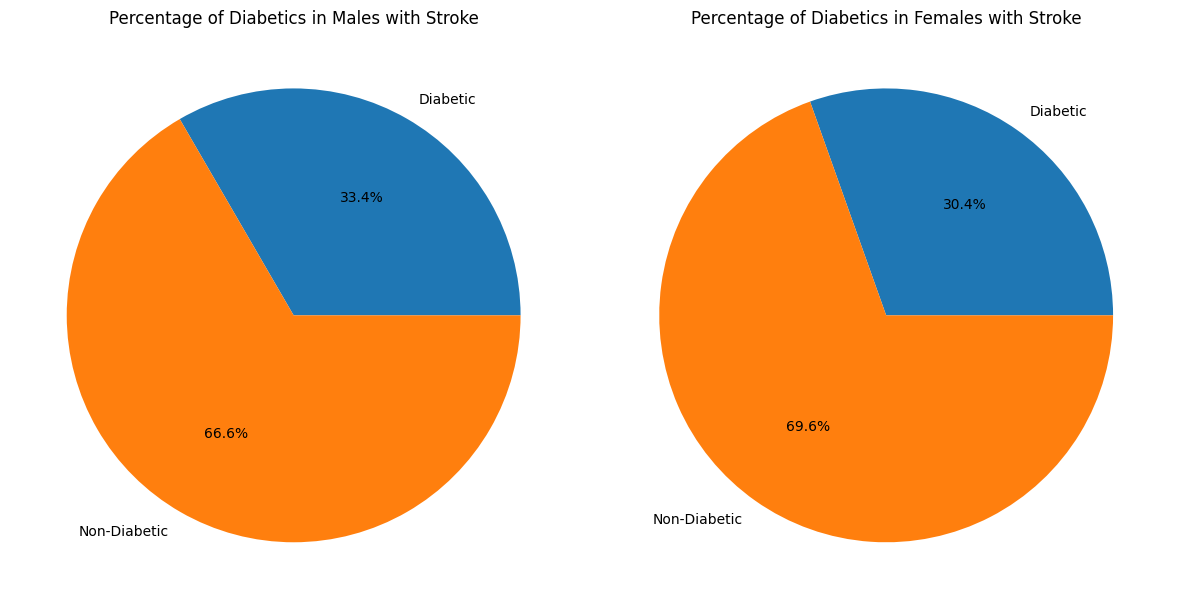

Percentage of diabetics in males with stroke: 33.4%
Percentage of diabetics in females with stroke: 30.4%


In [263]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")

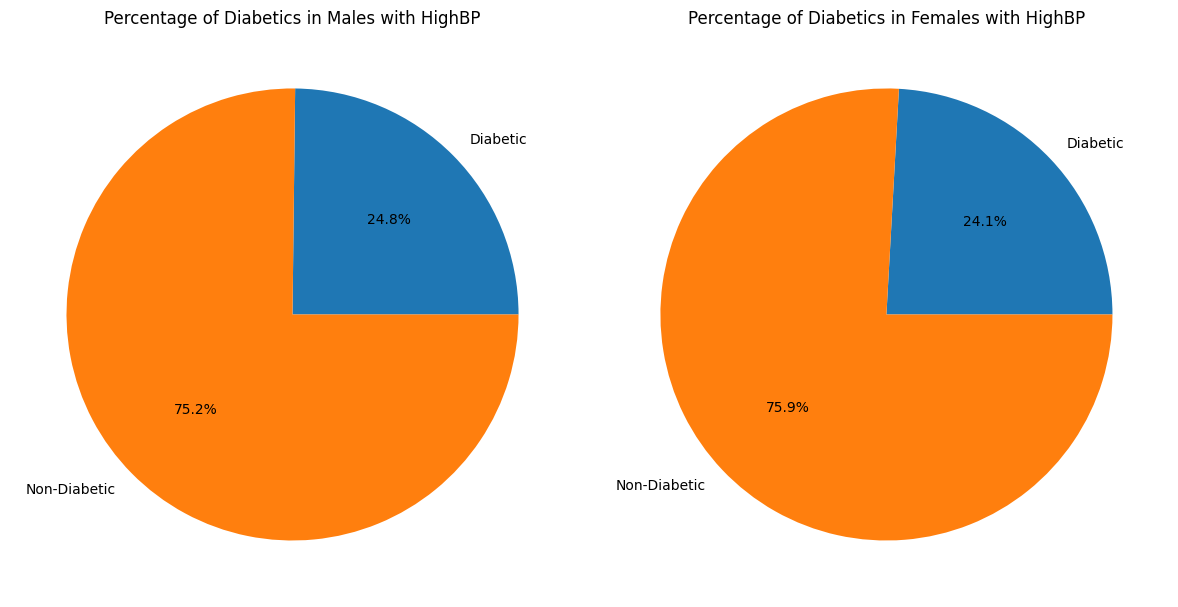

Percentage of diabetics in males with HighBP: 24.8%
Percentage of diabetics in females with HighBP: 24.1%


In [264]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")

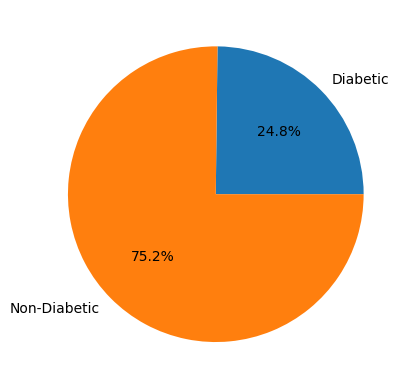

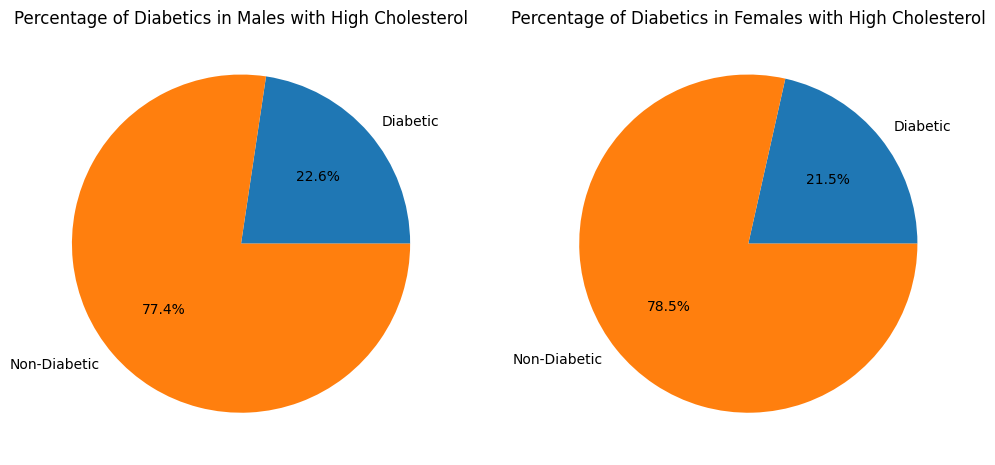

In [265]:
# Filter data for males and females with and without HighChol
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

# Calculate percentages of diabetics
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

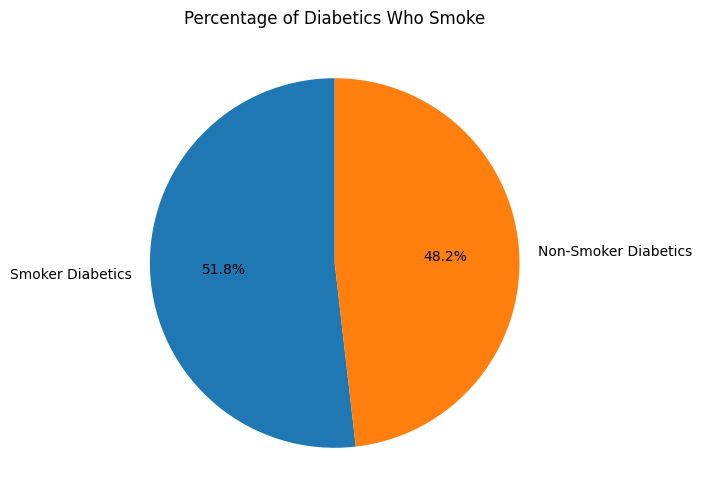

In [266]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()

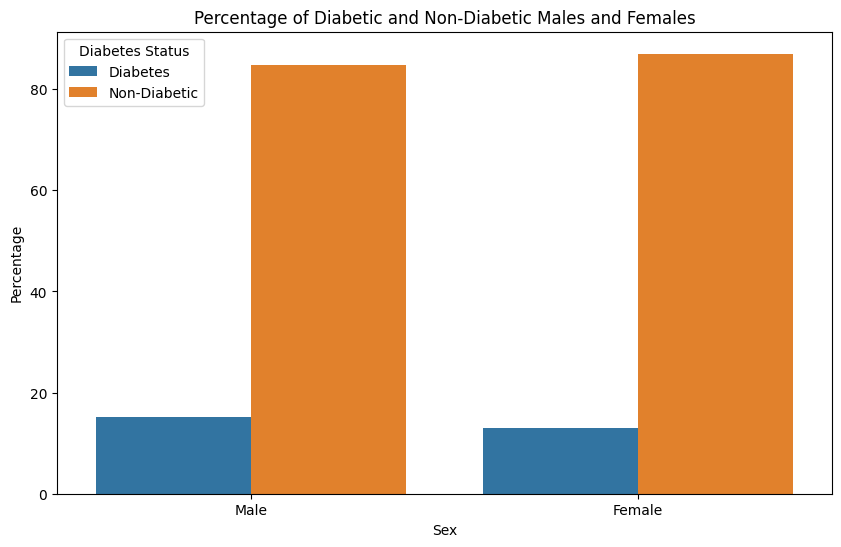

In [267]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetes', 'Non-Diabetic', 'Diabetes', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

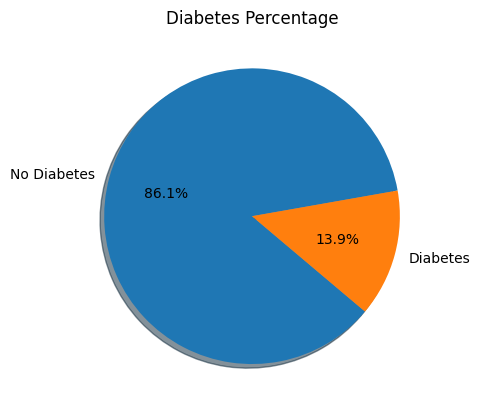

In [268]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()

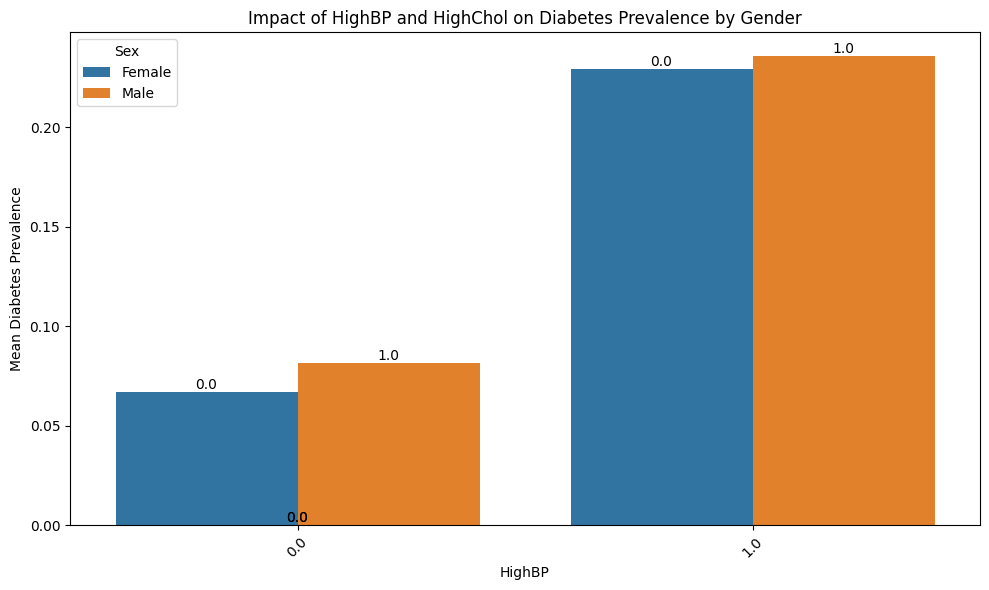

In [269]:
# prompt: show me if two features grouped how they will impact on diabetes for male and female

# Choose two features to analyze
feature1 = 'HighBP'  # Example feature 1
feature2 = 'HighChol'  # Example feature 2

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

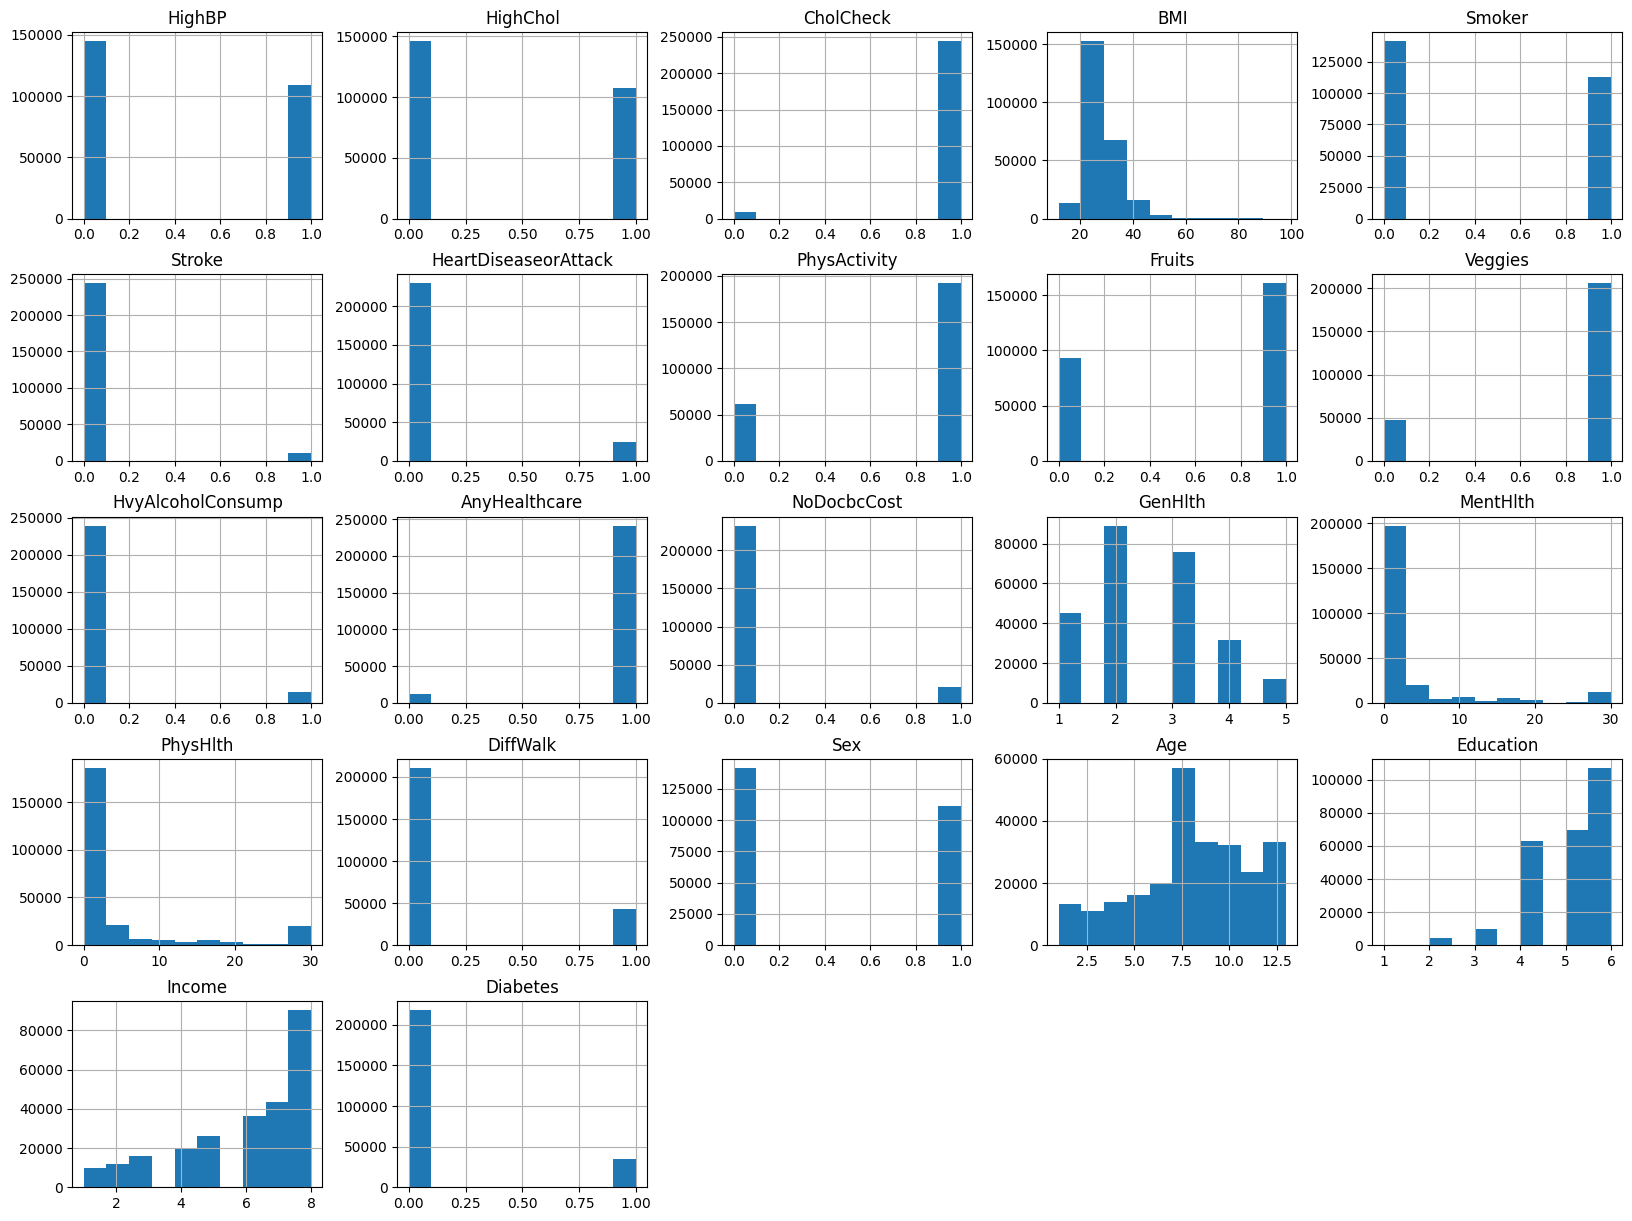

In [270]:
data.hist(figsize=(20,15))
plt.show()

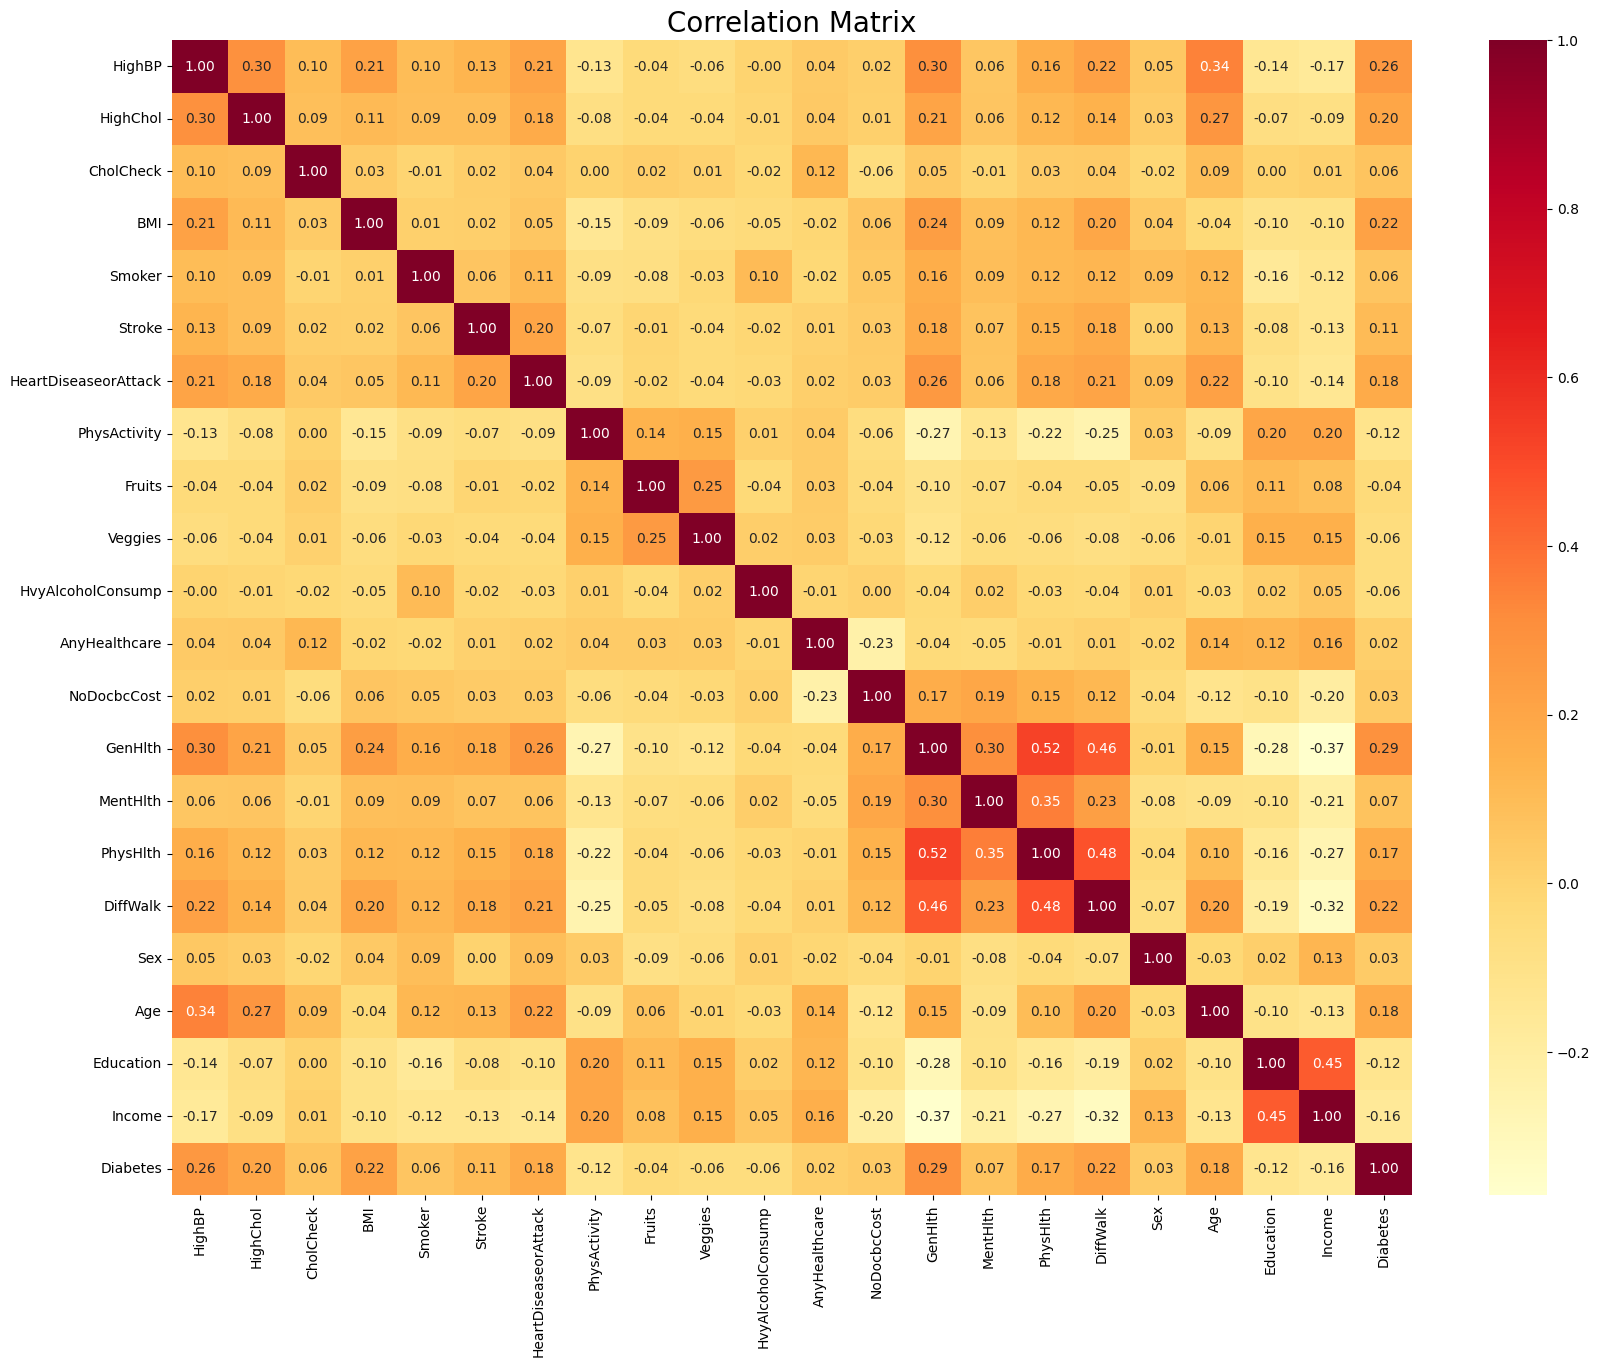

In [271]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [272]:
data1=data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
data1.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,1.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,25.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
3,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
5,1.0,0.0,27.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
6,1.0,1.0,24.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [273]:
from sklearn.model_selection import train_test_split
x= data1.drop('Diabetes', axis=1)
y = data1['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest

In [274]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [275]:
from sklearn.metrics import confusion_matrix, classification_report
rf_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print(classification_report(y_test, rf_pred))

[[41865  1874]
 [ 5601  1396]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.43      0.20      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



Logistic Regression

In [276]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [277]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[42743   996]
 [ 5833  1164]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



knn

In [278]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [279]:
knn_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print(cm)
print(classification_report(y_test, knn_pred))

[[41710  2029]
 [ 5581  1416]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     43739
         1.0       0.41      0.20      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



In [280]:
%pip install gradio

Note: you may need to restart the kernel to use updated packages.


Quality Assurance Plan for Diabetes Analysis and Prediction 

1. Introduction 

This Quality Assurance (QA) Plan outlines the approach to ensure the integrity, accuracy, and reliability of the synthetic health data generated using feature combinations. The goal of the QA process is to ensure that the data is of high quality and suitable for machine learning model development. 

2. Objectives 

The key objectives of this QA Plan are: 

To verify that the generated combinations accurately reflect all possible feature permutations. 

To ensure the generated data conforms to the defined constraints and ranges. 

To identify and mitigate any errors or inconsistencies in the generated data. 

To validate that the final dataset is suitable for use in machine learning algorithms. 

3. Quality Assurance Criteria 

The quality of the generated data will be evaluated based on the following criteria: 

Completeness: All valid combinations of the defined feature values are present in the generated dataset. 

Accuracy: Each feature value within the combination follows its defined range and characteristics. 

Consistency: Data adheres to logical relationships between features, e.g., age categories and BMI values align properly. 

Efficiency: The data generation process is free from memory errors and processes data in manageable chunks. 

4. Quality Assurance Activities 

4.1. Data Validation and Verification 

The first step is to validate and verify the feature definitions and the data generation process: 

Range Checks: Ensure that feature values are generated within the defined limits (e.g., BMI values, age categories, etc.). 

Logical Consistency Checks: Verify that logical constraints between features are maintained (e.g., an older age group having a higher likelihood of stroke). 

Data Type Verification: Ensure that each feature is correctly typed (e.g., integers for categories like age and education, floats for BMI). 

4.2. Data Sampling for Manual Review 

Since generating all combinations may result in a very large dataset, a random sample of combinations will be selected for manual review: 

Randomly select 1-2% of the data for manual inspection. 

Verify that the sampled data matches expected feature values and combinations. 

Validate whether feature combinations make sense in terms of the target use case. 

4.3. Automated Testing 

In addition to manual review, the following automated tests will be applied: 

Range Testing: Scripts to confirm that all feature values fall within the specified range. 

Combination Completeness: Automated tests to check that all valid combinations of the feature set have been generated. 

Memory and Efficiency Checks: Ensure that the batch processing does not run into memory issues and efficiently handles large datasets. 

5. Tools and Resources 

Pandas: To handle the data and verify its structure. 

Itertools: To generate feature combinations and ensure all permutations are covered. 

Unit Testing: Python unit test scripts to automate QA checks on data validity. 

Sampling Tools: Python’s random sampling libraries to draw samples for manual inspection. 

6. Roles and Responsibilities 

Data Engineer: Responsible for implementing the data generation process and writing the QA scripts. 

Quality Assurance Analyst: Responsible for conducting manual data reviews and ensuring that automated tests are properly implemented and executed. 

Project Manager: Responsible for overseeing the QA process, ensuring that the QA criteria are met, and coordinating between teams. 

7. Continuous Monitoring and Reporting 

Progress Reports: A weekly report on the quality assurance process will be provided, detailing any issues encountered and corrective actions taken. 

Issue Tracking: Any data inconsistencies, errors, or issues will be logged in an issue tracker, with priorities assigned for resolution. 

Final Approval: Once all tests have passed and the data is deemed accurate and complete, the dataset will be approved for use in the machine learning project. 

8. Risk Management 

The following risks have been identified, along with mitigation strategies: 

Memory Overload: If the data is too large to fit in memory, processing will be done in manageable chunks, and only a subset of combinations will be reviewed manually. 

Inconsistent Data: Manual review combined with automated checks will help catch inconsistent or illogical feature combinations. 

Slow Performance: The data generation script will be optimized to ensure efficiency, particularly with batch processing. 

9. Conclusion 

The QA Plan ensures that the synthetic health data generated meets high standards of accuracy, completeness, and consistency. With regular testing, monitoring, and manual reviews, the dataset will be verified as reliable and ready for machine learning use. 

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Comparison Plan</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid #dddddd;
            text-align: center;
            padding: 8px;
        }
        th {
            background-color: #f2f2f2;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
    </style>
</head>
<body>

<h2>Comparison of Original QA Test Plan and Modified QA Test Plan</h2>

<table>
    <thead>
        <tr>
            <th>Fields</th>
            <th>Original QA Test Plan</th>
            <th>Modified QA Test Plan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>HighBP</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>HighChol</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>BMI</td>
            <td>26</td>
            <td>3</td>
        </tr>
        <tr>
            <td>Stroke</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>HeartDiseaseorAttack</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>PhysActivity</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>HvyAlcoholConsump</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>AnyHealthcare</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>GenHlth</td>
            <td>5</td>
            <td>3</td>
        </tr>
        <tr>
            <td>PhysHlth</td>
            <td>30</td>
            <td>4</td>
        </tr>
        <tr>
            <td>DiffWalk</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>Sex</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>13</td>
            <td>4</td>
        </tr>
        <tr>
            <td>Education</td>
            <td>6</td>
            <td>3</td>
        </tr>
        <tr>
            <td>Income</td>
            <td>8</td>
            <td>3</td>
        </tr>
        <tr>
            <td><strong>Total Combinations</strong></td>
            <td><strong>1,246,003,200</strong></td>
            <td><strong>663,552</strong></td>
        </tr>
    </tbody>
</table>

</body>
</html>


In [282]:
import itertools

# Define the feature values based on your components
features = {
    "HighBP": [0, 1],
    "HighChol": [0, 1],
    "BMI": [15, 25, 35],  # Generate BMI values from 15 to 40
    "Stroke": [0, 1],
    "HeartDiseaseorAttack": [0, 1],
    "PhysActivity": [0, 1],
    "HvyAlcoholConsump": [0, 1],
    "AnyHealthcare": [0, 1],
    "GenHlth": [1, 3, 5],
    "PhysHlth": [1, 10, 20, 30],  # Days from 0 to 30
    "DiffWalk": [0, 1],
    "Sex": [0, 1],  # 0 for Female, 1 for Male
    "Age": [1, 5, 9, 13],  # Age categories 1 to 13
    "Education":[1, 3, 6],  # Education level from 1 to 6
    "Income": [1, 4, 8]  # Income level from 1 to 8
}
# Create an iterator for combinations instead of a list
combinations = itertools.product(*features.values())

# Process combinations one by one and write them to a CSV file in chunks
chunk_size = 100000  # Define how many rows to process per chunk
batch = []

# Open a CSV file to store the combinations
with open('all_combinations_health_data.csv', 'w') as f:
    # Write headers
    f.write(','.join(features.keys()) + '\n')
    
    for i, combination in enumerate(combinations):
        batch.append(combination)
        
        # When batch size is reached, write to file and clear batch
        if len(batch) == chunk_size:
            pd.DataFrame(batch, columns=features.keys()).to_csv(f, header=False, index=False)
            batch = []
    
    # Write any remaining rows in the batch
    if batch:
        pd.DataFrame(batch, columns=features.keys()).to_csv(f, header=False, index=False)

print("Data generation completed and saved to CSV.")


Data generation completed and saved to CSV.


In [283]:
combinations_df = pd.read_csv('all_combinations_health_data.csv')
combinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663552 entries, 0 to 663551
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                663552 non-null  int64
 1   HighChol              663552 non-null  int64
 2   BMI                   663552 non-null  int64
 3   Stroke                663552 non-null  int64
 4   HeartDiseaseorAttack  663552 non-null  int64
 5   PhysActivity          663552 non-null  int64
 6   HvyAlcoholConsump     663552 non-null  int64
 7   AnyHealthcare         663552 non-null  int64
 8   GenHlth               663552 non-null  int64
 9   PhysHlth              663552 non-null  int64
 10  DiffWalk              663552 non-null  int64
 11  Sex                   663552 non-null  int64
 12  Age                   663552 non-null  int64
 13  Education             663552 non-null  int64
 14  Income                663552 non-null  int64
dtypes: int64(15)
memory usage: 75.9 MB

In [284]:
feature_columns = ['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'PhysHlth', 'DiffWalk', 
                   'Sex', 'Age', 'Education', 'Income']

# Use lr.predict() to predict the results for each combination
lrpredictions = lr.predict(combinations_df[feature_columns])
rfpredictions = rf.predict(combinations_df[feature_columns])
knnpredictions = knn.predict(combinations_df[feature_columns])

# Convert the predictions to integers
lrpredictions = lrpredictions.astype('int64')
rfpredictions = rfpredictions.astype('int64')
knnpredictions = knnpredictions.astype('int64')

# Add the QApredictions as a new column in the DataFrame
combinations_df['QAlrPrediction'] = lrpredictions
combinations_df['QArfPrediction'] = rfpredictions
combinations_df['QAknnPrediction'] = knnpredictions

#Total Prediction
# combinations_df['QAtotalPrediction'] = lrpredictions + rfpredictions + knnpredictions


# Save the updated DataFrame with predictions to a new CSV file
combinations_df.to_csv('all_combinations_health_data_with_predictions.csv', index=False)

print("Predictions added and saved to 'all_combinations_health_data_with_predictions.csv'.")
combinations_df.info()

Predictions added and saved to 'all_combinations_health_data_with_predictions.csv'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663552 entries, 0 to 663551
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                663552 non-null  int64
 1   HighChol              663552 non-null  int64
 2   BMI                   663552 non-null  int64
 3   Stroke                663552 non-null  int64
 4   HeartDiseaseorAttack  663552 non-null  int64
 5   PhysActivity          663552 non-null  int64
 6   HvyAlcoholConsump     663552 non-null  int64
 7   AnyHealthcare         663552 non-null  int64
 8   GenHlth               663552 non-null  int64
 9   PhysHlth              663552 non-null  int64
 10  DiffWalk              663552 non-null  int64
 11  Sex                   663552 non-null  int64
 12  Age                   663552 non-null  int64
 13  Education             663552 non-null  int64
 14  

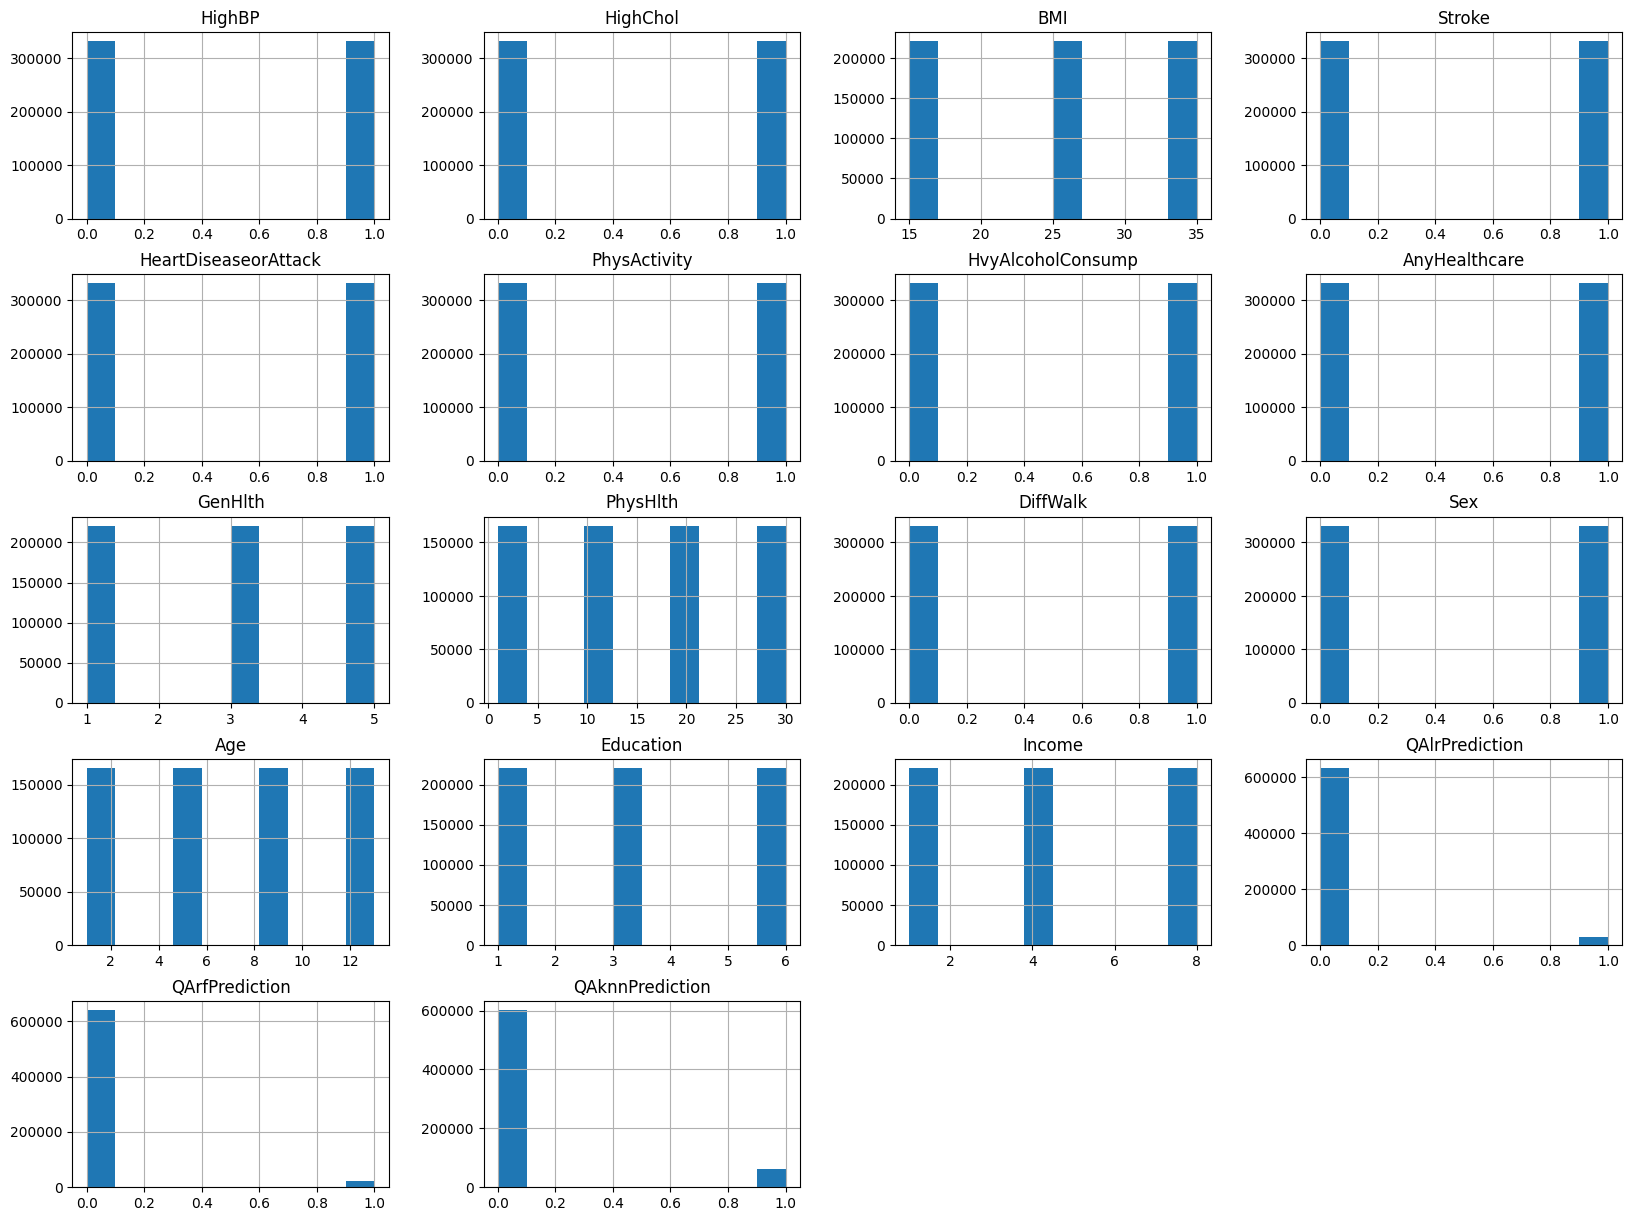

In [285]:
combinations_df.hist(figsize=(20,15))
plt.show()

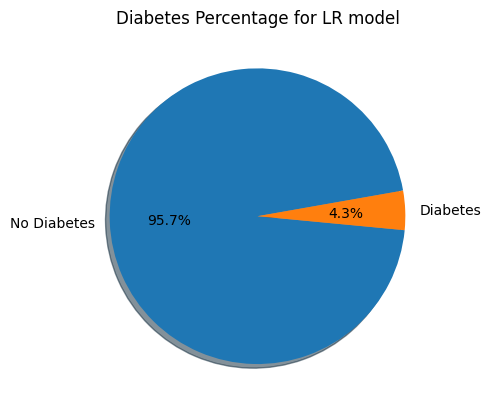

In [292]:

labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(combinations_df['QAlrPrediction'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage for LR model')
plt.show()


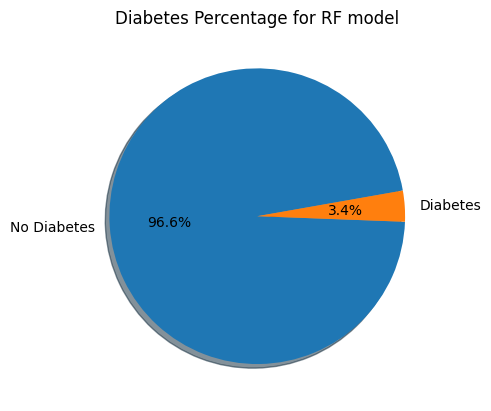

In [293]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(combinations_df['QArfPrediction'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage for RF model')
plt.show()

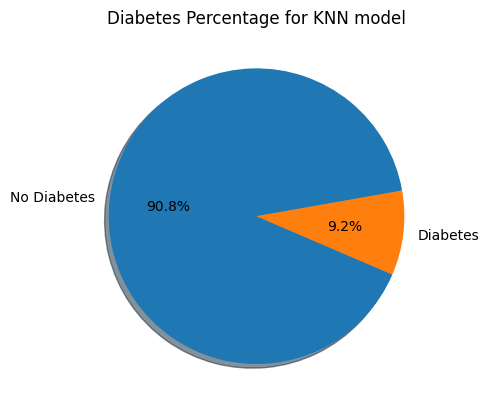

In [294]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(combinations_df['QAknnPrediction'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage for KNN model')
plt.show()

In [296]:
#create data for manual inspection

from sklearn.model_selection import train_test_split
# tx = combinations_df.drop('QAtotalPrediction', axis=1)
# ty = combinations_df['QAtotalPrediction']
lrx = combinations_df.drop('QAlrPrediction', axis=1)
lry = combinations_df['QAlrPrediction']
rfx = combinations_df.drop('QArfPrediction', axis=1)
rfy = combinations_df['QArfPrediction']
knnx = combinations_df.drop('QAknnPrediction', axis=1)
knny = combinations_df['QAknnPrediction']


# tx_test, lrx_text, lry_test & knnx_test are for manual checking
# tx_train, tx_test, ty_train, ty_test = train_test_split(tx, ty, test_size=0.1, random_state=42)
lrx_train, lrx_test, lry_train, lry_test = train_test_split(lrx, lry, test_size=0.1, random_state=42)
rfx_train, rfx_test, rfy_train, rfy_test = train_test_split(rfx, rfy, test_size=0.1, random_state=42)
knnx_train, knnx_test, knny_train, knny_test = train_test_split(knnx, knny, test_size=0.1, random_state=42)

# tx_test.to_csv('manual_inspection_total.csv', index=False)
lrx_test.to_csv('manual_inspection_lr.csv', index=False)
rfx_test.to_csv('manual_inspection_rf.csv', index=False)
knnx_test.to_csv('manual_inspection_knn.csv', index=False)
lrx_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66356 entries, 590762 to 80422
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                66356 non-null  int64
 1   HighChol              66356 non-null  int64
 2   BMI                   66356 non-null  int64
 3   Stroke                66356 non-null  int64
 4   HeartDiseaseorAttack  66356 non-null  int64
 5   PhysActivity          66356 non-null  int64
 6   HvyAlcoholConsump     66356 non-null  int64
 7   AnyHealthcare         66356 non-null  int64
 8   GenHlth               66356 non-null  int64
 9   PhysHlth              66356 non-null  int64
 10  DiffWalk              66356 non-null  int64
 11  Sex                   66356 non-null  int64
 12  Age                   66356 non-null  int64
 13  Education             66356 non-null  int64
 14  Income                66356 non-null  int64
 15  QArfPrediction        66356 non-null  int64
 16  QAkn

In [287]:
import numpy as np
import gradio as gr
import joblib

# Load the trained Random Forest model


def predict_diabetes(HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
                     HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
                     Sex, Age, Education, Income):
    # Create a list of features
    features = [HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
                HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
                Sex, Age, Education, Income]

    # Convert features to a NumPy array and reshape for prediction
    features_array = np.array(features).reshape(1, -1)

    # Use the trained Logistic Regression model to make a prediction 
    # prediction = rf.predict(features_array)[0]
    # prediction = rf.predict(features_array)
    prediction = lr.predict(features_array)

    # Return the prediction result as a string
    return 'Diabetic' if prediction == 1 else 'Non-Diabetic'

# Create Gradio interface

inputs = [
    gr.components.Radio([0, 1], label="Do you have high blood pressure? (0=No, 1=Yes)",value=0),
    gr.components.Radio([0, 1], label="Do you have high blood cholesterol? (0=No, 1=Yes)", value=0),
    gr.components.Number(label="What is you Body Mass Index (BMI)?",value=20),
    gr.components.Radio([0, 1], label="Do you have any stroke before? (0=No, 1=Yes) ",value=0),
    gr.components.Radio([0, 1], label="Do you have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)? (0=No, 1=Yes)",value=0),
    gr.components.Radio([0, 1], label="Do you do physical activity or exercise during the past 30 days other than your regular job? (0=No, 1=Yes)",value=1),
    gr.components.Radio([0, 1], label="Are you a heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (0=No, 1=Yes)",value=0),
    gr.components.Radio([0, 1], label="Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0=No, 1=Yes)",value=1),
    gr.components.Slider(1, 5, step=1, label="Would you say that in general your health.(1=Excellent;2=Very good;3=Good;4=Fair;5=Poor)",value=3),
    gr.components.Slider(0, 30, step=1, label="Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?",value=20),
    gr.components.Radio([0, 1], label="Do you have serious difficulty walking or climbing stairs?(0=No, 1=Yes) ", value=0),
    gr.components.Radio([0, 1], label="Sex (0 for Female, 1 for Male)", value=1),
    gr.components.Slider(1, 13, step=1, label="Please indicate your age category. (1=18-24;2=25-29;3=30-34;4=35-39;5=40-44;6=45-49;7=50-54;8=55-59;9=60-64;10=65-69;11=70-74;12=75-79;13>=80)",value=5),
    gr.components.Slider(1, 6, step=1, label="What is the highest grade or year of school you completed?1=Never;2=Elementary;3=Some high school;4=High school graduate;5=Some college or technical school;6=College graduate ", value=4),
    gr.components.Slider(1, 8, step=1, label="What is your annual household income from all sources? (1<$10K;2<$15K;3<$20K;4<$25K;5<$35K;6<$50K;7<$75K;8>$75K)",value=4)
]

output = gr.components.Label(label="Diabetes Prediction")

gr_interface = gr.Interface(fn=predict_diabetes, inputs=inputs, outputs=output)
gr_interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
